In [2]:
%load_ext autoreload

In [39]:
%autoreload 2

import sys
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import accuracy_score, precision_score

import numpy as np

sys.path.append("../")
from src.model import MLModel

In [49]:
y = [1, 0, 1]
pred = [1, 1, 1]
# precision_score(y, pred)

y = np.array([[1, 2], [3, 2], [0, 1]])
print(np.argmax(y, axis=1))

[1 0 1]


In [56]:
def precision(y_true, y_pred):
    y_pred_class = y_pred >= 0.5
    score = precision_score(y_true, y_pred_class)
    return "precision", score, True

[LightGBM] [Info] Number of positive: 403, number of negative: 397
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503750 -> initscore=0.015000
[LightGBM] [Info] Start training from score 0.015000
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.577672	valid_0's precision: 0.892473
Accuracy: 0.885


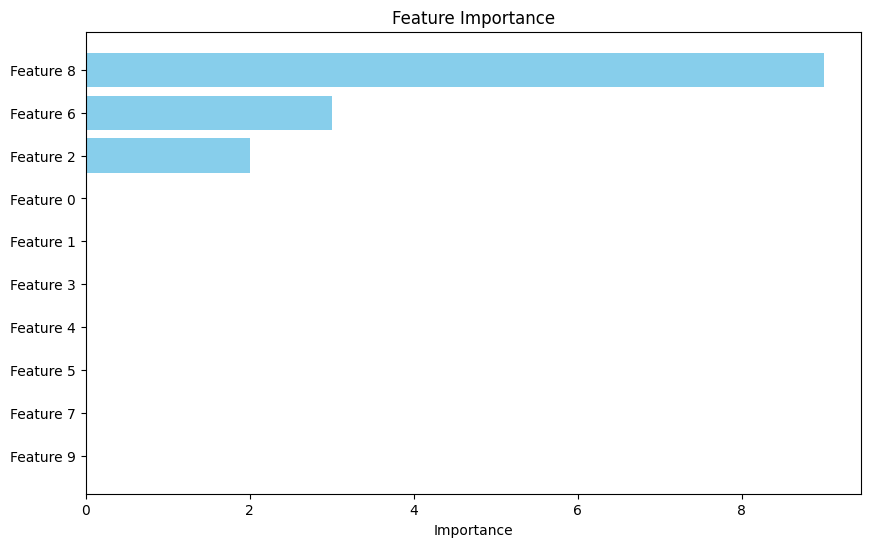

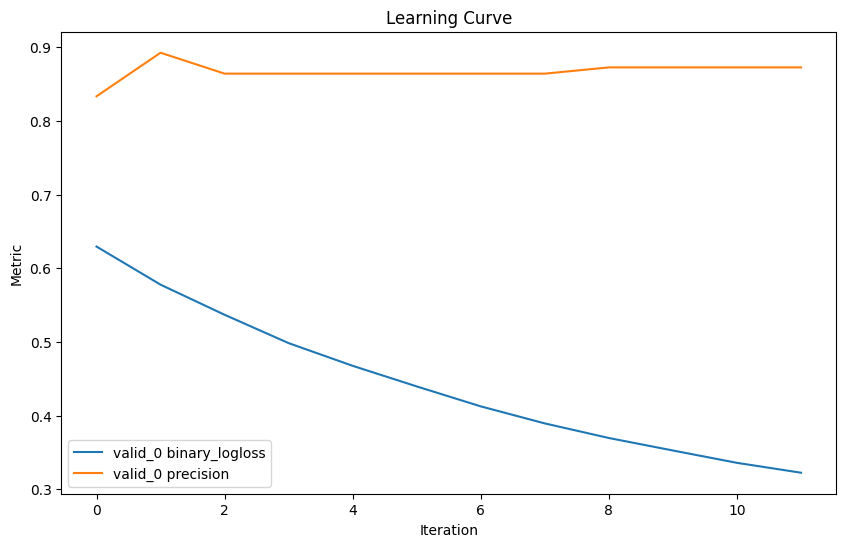

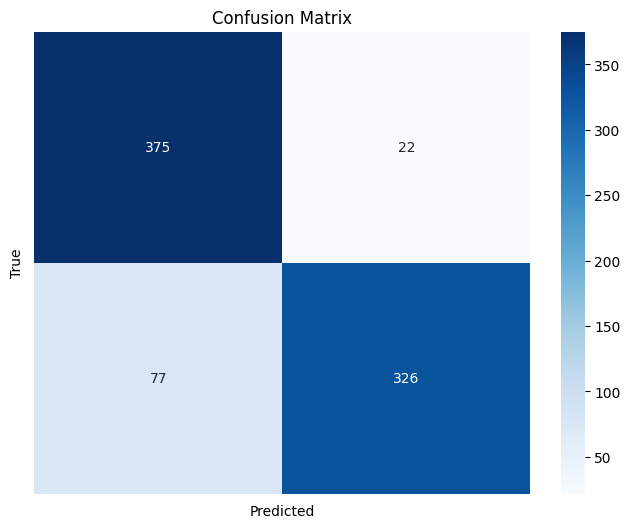

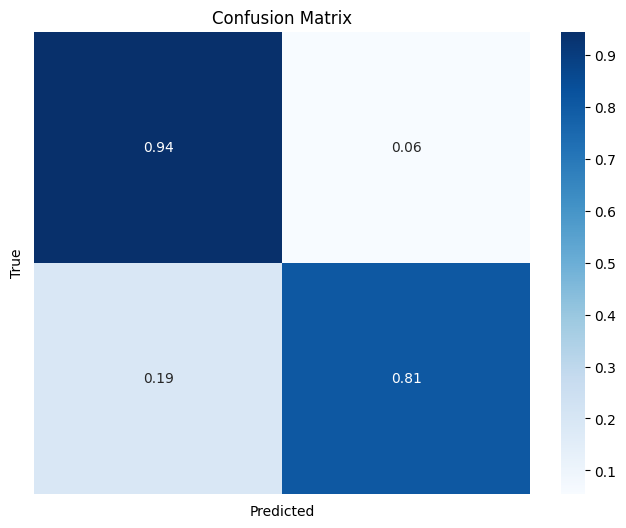

In [61]:
model_type = "lightgbm"
task = "classification"
model_params = {
    "n_estimators": 100,
    "max_depth": 3
}
early_stopping_rounds = 10


# 分類問題
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_val, y_train, y_val = X[:800], X[800:], y[:800], y[800:]

model = MLModel(
    model_type=model_type,
    task=task,
    model_params=model_params,
    custom_loss=precision
)
model.train(
    X_train,
    y_train,
    eval_set=(X_val, y_val),
    early_stopping_rounds=early_stopping_rounds,
)

print(f"Accuracy: {model.evaluate(X_val, y_val)}")

model.save_model("/tmp/model.pkl")
model.load_model("/tmp/model.pkl")

model.visualize_feature_importance(feature_names=[f"Feature {i}" for i in range(X.shape[1])])
model.visualize_learning_curve(X_train, y_train)
model.visualize_confusion_matrix(X_train, y_train)
model.visualize_confusion_matrix(X_train, y_train, normalize=True)



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Start training from score 3.355837
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

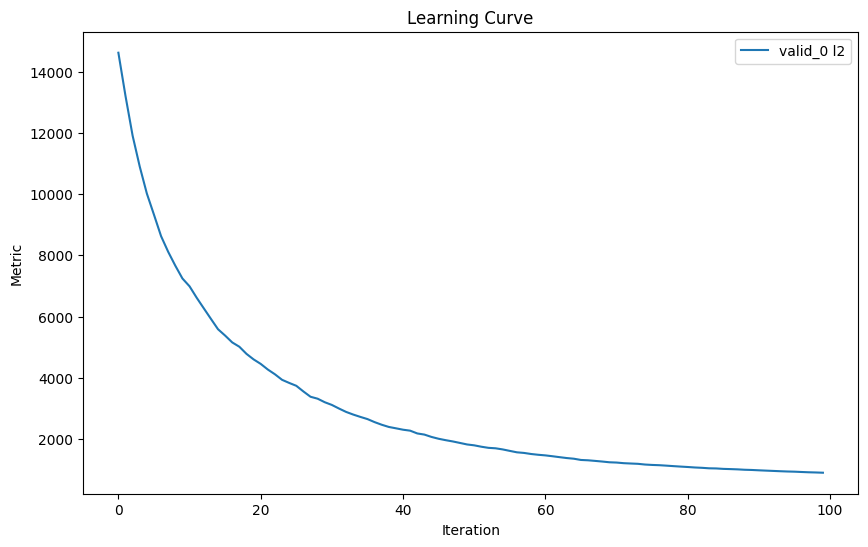

In [62]:
model_type = "lightgbm"
task = "regression"
model_params = {
    "n_estimators": 100,
    "max_depth": 3
}
early_stopping_rounds = 10

# 回帰問題
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

X_train, X_val, y_train, y_val = X[:800], X[800:], y[:800], y[800:]

model = MLModel(
    model_type=model_type,
    task="regression",
    model_params=model_params,
)
model.train(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=10)
print(f"RMSE: {model.evaluate(X_val, y_val)}")

model.visualize_learning_curve(X_train, y_train)